In [230]:
install.packages("readr")

Warning message:
"package 'readr' is in use and will not be installed"


In [231]:
library(tidyverse)
library(lubridate)
library(hms)
library(readr)
library(tidyr)
library(dplyr)

## TASK 1

### Political Seats

In [232]:
political_seats <- read_delim("../datasets/political_seats.csv", delim = ",", locale = locale(encoding = "ISO-8859-1"), skip = 2)
head(political_seats)

Rows: 2619 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (15): region, party, 1973, 1976, 1979, 1982, 1985, 1988, 1991, 1994, 199...
dbl  (2): 2018, 2022

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


region,party,1973,1976,1979,1982,1985,1988,1991,1994,1998,2002,2006,2010,2014,2018,2022
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
0114 Upplands Väsby,The Moderate Party,6,7,10,13,13,12,15,14,16,11,17,17,13,12,11
0114 Upplands Väsby,The Centre Party,9,7,6,4,2,2,2,2,2,2,2,2,2,2,2
0114 Upplands Väsby,The Liberal Party,4,5,5,3,6,7,6,4,4,8,6,6,4,3,2
0114 Upplands Väsby,The Christian Democratic Party,0,0,0,1,0,0,2,1,3,3,3,2,2,3,2
0114 Upplands Väsby,The Green Party,..,..,..,1,2,4,2,3,2,2,3,5,5,2,2
0114 Upplands Väsby,The Social Democratic Party,19,19,23,24,23,23,18,24,18,20,16,15,16,13,14


In [233]:
print(colSums(political_seats == ".."))

political_seats[political_seats==".."] <- "0"

print(colSums(political_seats == ".."))
head(political_seats)

region  party   1973   1976   1979   1982   1985   1988   1991   1994   1998 
     0      0    673    680    666    347    347     63     45     27     18 
  2002   2006   2010   2014   2018   2022 
     9      9      9      9      0      0 
region  party   1973   1976   1979   1982   1985   1988   1991   1994   1998 
     0      0      0      0      0      0      0      0      0      0      0 
  2002   2006   2010   2014   2018   2022 
     0      0      0      0      0      0 


region,party,1973,1976,1979,1982,1985,1988,1991,1994,1998,2002,2006,2010,2014,2018,2022
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
0114 Upplands Väsby,The Moderate Party,6,7,10,13,13,12,15,14,16,11,17,17,13,12,11
0114 Upplands Väsby,The Centre Party,9,7,6,4,2,2,2,2,2,2,2,2,2,2,2
0114 Upplands Väsby,The Liberal Party,4,5,5,3,6,7,6,4,4,8,6,6,4,3,2
0114 Upplands Väsby,The Christian Democratic Party,0,0,0,1,0,0,2,1,3,3,3,2,2,3,2
0114 Upplands Väsby,The Green Party,0,0,0,1,2,4,2,3,2,2,3,5,5,2,2
0114 Upplands Väsby,The Social Democratic Party,19,19,23,24,23,23,18,24,18,20,16,15,16,13,14


In [234]:
political_seats <- type.convert(political_seats, as.is = T)

In [235]:
political_seats <- political_seats %>%
    pivot_longer(
        cols = -c(region, party),
        names_to = "year",
        values_to = "value"
    )
head(political_seats)

region,party,year,value
<chr>,<chr>,<chr>,<int>
0114 Upplands Väsby,The Moderate Party,1973,6
0114 Upplands Väsby,The Moderate Party,1976,7
0114 Upplands Väsby,The Moderate Party,1979,10
0114 Upplands Väsby,The Moderate Party,1982,13
0114 Upplands Väsby,The Moderate Party,1985,13
0114 Upplands Väsby,The Moderate Party,1988,12


In [236]:
political_seats <- political_seats %>% 
    pivot_wider(
        names_from = party,
        values_from = value
    )
head(political_seats)

region,year,The Moderate Party,The Centre Party,The Liberal Party,The Christian Democratic Party,The Green Party,The Social Democratic Party,The Left Party,The Sweden Democrats,Other Parties
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0114 Upplands Väsby,1973,6,9,4,0,0,19,3,0,0
0114 Upplands Väsby,1976,7,7,5,0,0,19,3,0,0
0114 Upplands Väsby,1979,10,6,5,0,0,23,4,0,1
0114 Upplands Väsby,1982,13,4,3,1,1,24,3,0,0
0114 Upplands Väsby,1985,13,2,6,0,2,23,3,0,0
0114 Upplands Väsby,1988,12,2,7,0,4,23,3,0,0


### Income Statements

In [237]:
income <- read_delim("../datasets/income_statements.csv", delim = ",", locale = locale(encoding = "ISO-8859-1"), skip = 2)
income <- income[ , !(names(income) %in% "2022")]
income[income == ".."] <- "0"
income[is.na(income)] <- 0
income <- type.convert(income, as.is = T)
head(income, show_col_types = FALSE)

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Rows: 2900 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): region, Income statement, 1998, 1999, 2000, 2001, 2002
dbl (20): 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


region,Income statement,1998,1999,2000,2001,2002,2003,2004,2005,⋯,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0114 Upplands Väsby,Total income for operations,313859,320220,336174,336141,323270,326945,338661,294027,⋯,471479,535209,456069,481597,583319,679812,647216,761770,821974,695537
0114 Upplands Väsby,Total costs for operations,-1141598,-1203938,-1252714,-1350430,-1394331,-1425350,-1436221,-1482268,⋯,-2118627,-2151509,-2243467,-2334378,-2569542,-2763185,-2855518,-2991574,-3141144,-3196316
0114 Upplands Väsby,Total net current costs,-889629,-952527,-985316,-1087250,-1141651,-1173078,-1173210,-1262964,⋯,-1707148,-1727400,-1860350,-2030832,-2075700,-2192740,-2325264,-2362143,-2445112,-2628115
0114 Upplands Väsby,Tax revenues,897383,949536,1030710,1114591,1187046,1261155,1261098,1261400,⋯,1527012,1591627,1647867,1754223,1853785,1944788,1994208,2076660,2084321,2235203
0114 Upplands Väsby,General grants and equalisation grants,45111,45305,20248,-15154,-44613,-85979,-78680,11879,⋯,219247,234573,250406,227687,256824,326711,342292,378413,570439,571510
0114 Upplands Väsby,Net profit/loss for operations,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,92930,209648,178598


In [238]:
income <- pivot_longer(income, cols= -c("region", "Income statement"), names_to ="year", values_to="values")
income

region,Income statement,year,values
<chr>,<chr>,<chr>,<int>
0114 Upplands Väsby,Total income for operations,1998,313859
0114 Upplands Väsby,Total income for operations,1999,320220
0114 Upplands Väsby,Total income for operations,2000,336174
0114 Upplands Väsby,Total income for operations,2001,336141
0114 Upplands Väsby,Total income for operations,2002,323270
0114 Upplands Väsby,Total income for operations,2003,326945
0114 Upplands Väsby,Total income for operations,2004,338661
0114 Upplands Väsby,Total income for operations,2005,294027
0114 Upplands Väsby,Total income for operations,2006,316172


In [239]:
income <- type.convert(income, as.is = T)
head(income)

region,Income statement,year,values
<chr>,<chr>,<int>,<int>
0114 Upplands Väsby,Total income for operations,1998,313859
0114 Upplands Väsby,Total income for operations,1999,320220
0114 Upplands Väsby,Total income for operations,2000,336174
0114 Upplands Väsby,Total income for operations,2001,336141
0114 Upplands Väsby,Total income for operations,2002,323270
0114 Upplands Väsby,Total income for operations,2003,326945


In [240]:
grouped_data <- income %>%
  group_by(region, `Income statement`)

# Calculate the mean value for each four-year interval within each group
reduced_data <- grouped_data %>%
  mutate(interval = floor((year - first(year))/4) * 4 + first(year)) %>%
  group_by(region, `Income statement`, interval) %>%
  summarise(year = first(year), value = mean(values))

# Keep only the first year in each four-year interval
income <- reduced_data %>%
  group_by(region, `Income statement`) %>%
  filter(interval == year) %>%
  select(region, `Income statement`, year, value)

`summarise()` has grouped output by 'region', 'Income statement'. You can
override using the `.groups` argument.


In [241]:
head(income)

region,Income statement,year,value
<chr>,<chr>,<int>,<dbl>
0114 Upplands Väsby,Financial costs,1998,-24523.00
0114 Upplands Väsby,Financial costs,2002,-2055.75
0114 Upplands Väsby,Financial costs,2006,-639.00
0114 Upplands Väsby,Financial costs,2010,-24194.25
0114 Upplands Väsby,Financial costs,2014,-14283.50
0114 Upplands Väsby,Financial costs,2018,-20137.75


In [242]:
income <- income %>% 
    pivot_wider(
        names_from = `Income statement`,
        values_from = value
    )
head(income)

region,year,Financial costs,Financial income,General grants and equalisation grants,Net profit/loss after financial items,Net profit/loss for operations,Net profit/loss for the year,Tax revenues,Total costs for operations,Total income for operations,Total net current costs
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0114 Upplands Väsby,1998,-24523.00,9788.00,23877.50,27648.75,0,110289.50,998055,-1237170,326598.5,-978680.5
0114 Upplands Väsby,2002,-2055.75,3965.75,-49348.25,6419.50,0,3419.50,1242675,-1434543,320725.8,-1187725.8
0114 Upplands Väsby,2006,-639.00,7109.25,79793.00,29956.00,0,29956.00,1373671,-1697857,343533.8,-1426587.0
0114 Upplands Väsby,2010,-24194.25,9167.75,212560.75,35653.25,0,35653.25,1506149,-2057643,460183.5,-1667388.0
0114 Upplands Väsby,2014,-14283.50,196292.50,265407.00,207676.50,0,207676.50,1800166,-2477643,550199.2,-2039905.5
0114 Upplands Väsby,2018,-20137.75,13044.25,465663.50,116009.25,120294,116009.25,2097598,-3046138,731624.2,-2440158.5


In [243]:
df <- merge(political_seats, income, by = c("year", "region"))
head(df)

,year,region,The Moderate Party,The Centre Party,The Liberal Party,The Christian Democratic Party,The Green Party,The Social Democratic Party,The Left Party,The Sweden Democrats,⋯,Financial costs,Financial income,General grants and equalisation grants,Net profit/loss after financial items,Net profit/loss for operations,Net profit/loss for the year,Tax revenues,Total costs for operations,Total income for operations,Total net current costs
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1998,0114 Upplands Väsby,16,2,4,3,2,18,5,0,⋯,-24523.00,9788.00,23877.50,27648.75,0,110289.50,998055.0,-1237170.0,326598.5,-978680.5
2,1998,0115 Vallentuna,16,4,2,4,2,9,3,0,⋯,-3282.00,3927.00,57182.00,-475.75,0,16640.25,576253.5,-755892.5,169653.8,-633760.0
3,1998,0117 Österåker,20,2,3,4,2,15,3,0,⋯,-9833.00,2517.00,5019.25,-12078.50,0,-12078.50,905556.0,-1030488.8,151653.8,-913898.8
4,1998,0120 Värmdö,17,2,2,2,2,13,3,0,⋯,-3350.25,10293.00,63439.00,-8109.50,0,-19606.00,712872.5,-988970.0,233789.2,-790366.8
5,1998,0123 Järfälla,18,2,5,6,2,23,5,0,⋯,-25041.25,39573.75,-19922.50,2210.75,0,2210.75,1635131.8,-1937833.0,447106.8,-1625076.8
6,1998,0125 Ekerö,17,3,3,3,4,9,2,0,⋯,-15667.25,3988.00,8512.75,-6576.50,0,10872.25,601955.5,-719280.5,147936.8,-604585.5


In [247]:
right <- rowSums(df[, c("The Christian Democratic Party", "The Liberal Party", "The Moderate Party")])
centre <- df[["The Centre Party"]]
left <- rowSums(df[, c("The Green Party", "The Left Party", "The Social Democratic Party")])
indices <- rownames(df)

In [248]:
majority <- character(length(right))
for (i in 1:length(right)) {
  if (indices[i] == "2018") {
    if (left[i] + centre[i] > right[i]) {
      majority[i] <- "left"
    } else if (left[i] + centre[i] < right[i]) {
      majority[i] <- "right"
    } else {
      majority[i] <- "tie"
    }
  } else {
    if (left[i] > right[i] + centre[i]) {
      majority[i] <- "left"
    } else if (left[i] < right[i] + centre[i]) {
      majority[i] <- "right"
    } else {
      majority[i] <- "tie"
    }
  }
}

In [249]:
df$majority <- majority

In [251]:
head(df)

,year,region,The Moderate Party,The Centre Party,The Liberal Party,The Christian Democratic Party,The Green Party,The Social Democratic Party,The Left Party,The Sweden Democrats,⋯,Financial income,General grants and equalisation grants,Net profit/loss after financial items,Net profit/loss for operations,Net profit/loss for the year,Tax revenues,Total costs for operations,Total income for operations,Total net current costs,majority
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1998,0114 Upplands Väsby,16,2,4,3,2,18,5,0,⋯,9788.00,23877.50,27648.75,0,110289.50,998055.0,-1237170.0,326598.5,-978680.5,tie
2,1998,0115 Vallentuna,16,4,2,4,2,9,3,0,⋯,3927.00,57182.00,-475.75,0,16640.25,576253.5,-755892.5,169653.8,-633760.0,right
3,1998,0117 Österåker,20,2,3,4,2,15,3,0,⋯,2517.00,5019.25,-12078.50,0,-12078.50,905556.0,-1030488.8,151653.8,-913898.8,right
4,1998,0120 Värmdö,17,2,2,2,2,13,3,0,⋯,10293.00,63439.00,-8109.50,0,-19606.00,712872.5,-988970.0,233789.2,-790366.8,right
5,1998,0123 Järfälla,18,2,5,6,2,23,5,0,⋯,39573.75,-19922.50,2210.75,0,2210.75,1635131.8,-1937833.0,447106.8,-1625076.8,right
6,1998,0125 Ekerö,17,3,3,3,4,9,2,0,⋯,3988.00,8512.75,-6576.50,0,10872.25,601955.5,-719280.5,147936.8,-604585.5,right


## Task 2

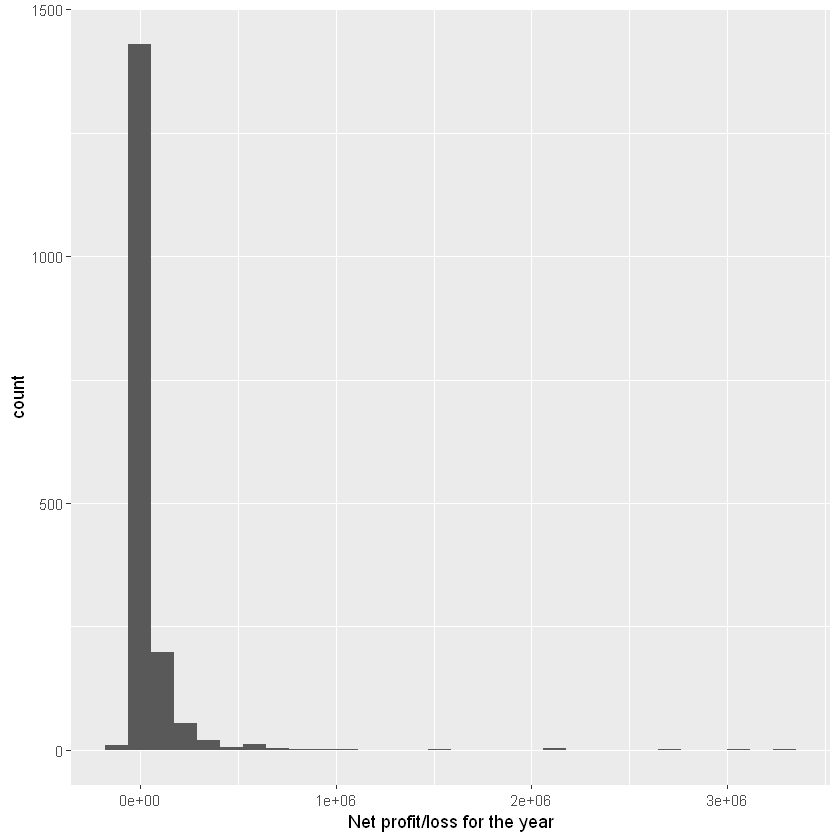

In [253]:
ggplot(data = df) +
  geom_histogram(mapping = aes(x = `Net profit/loss for the year`), bins=30)

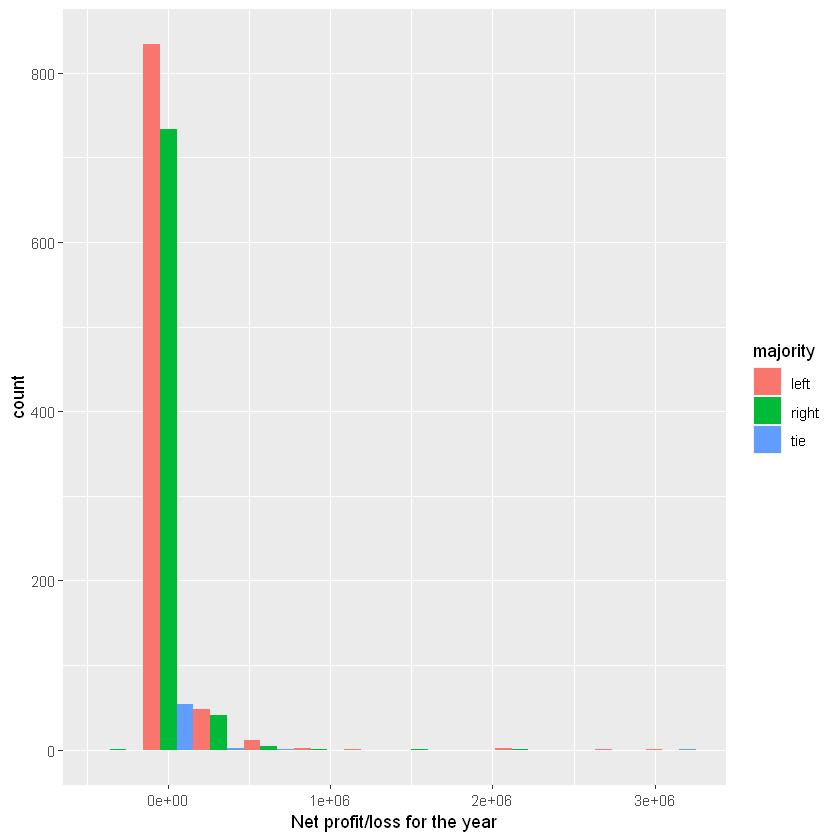

In [256]:
ggplot(data = df) +
  geom_histogram(mapping = aes(x = `Net profit/loss for the year`, fill=majority), bins=12, position = "dodge")

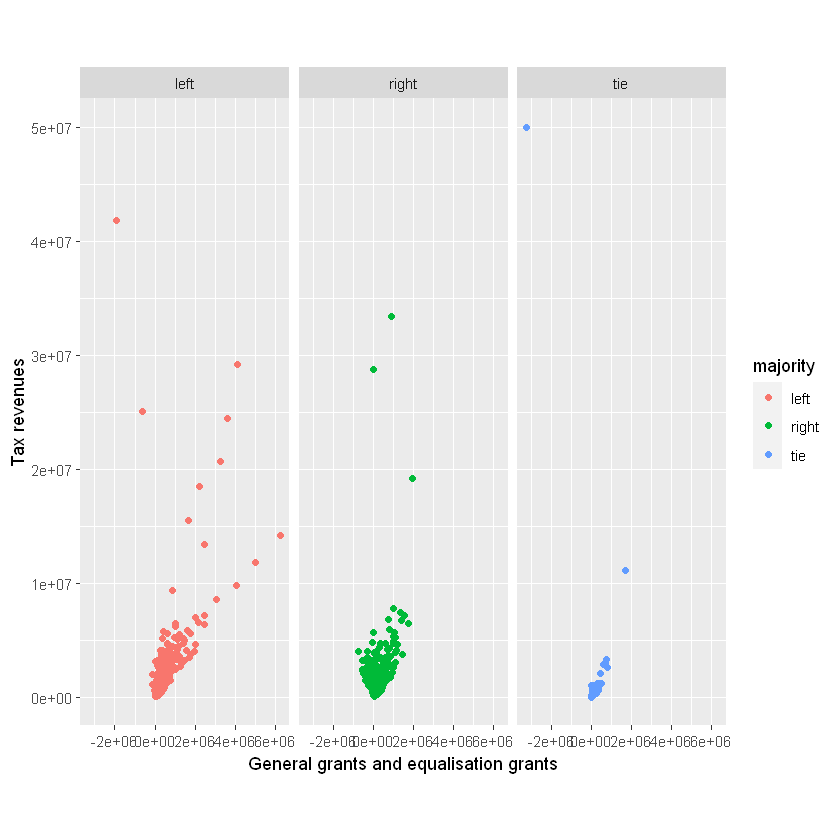

In [260]:
ggplot(data = df) +
  geom_point(mapping = aes(x = `General grants and equalisation grants`, y = `Tax revenues`, color=majority)) + 
  facet_wrap(~majority) + 
  theme(aspect.ratio = 3)

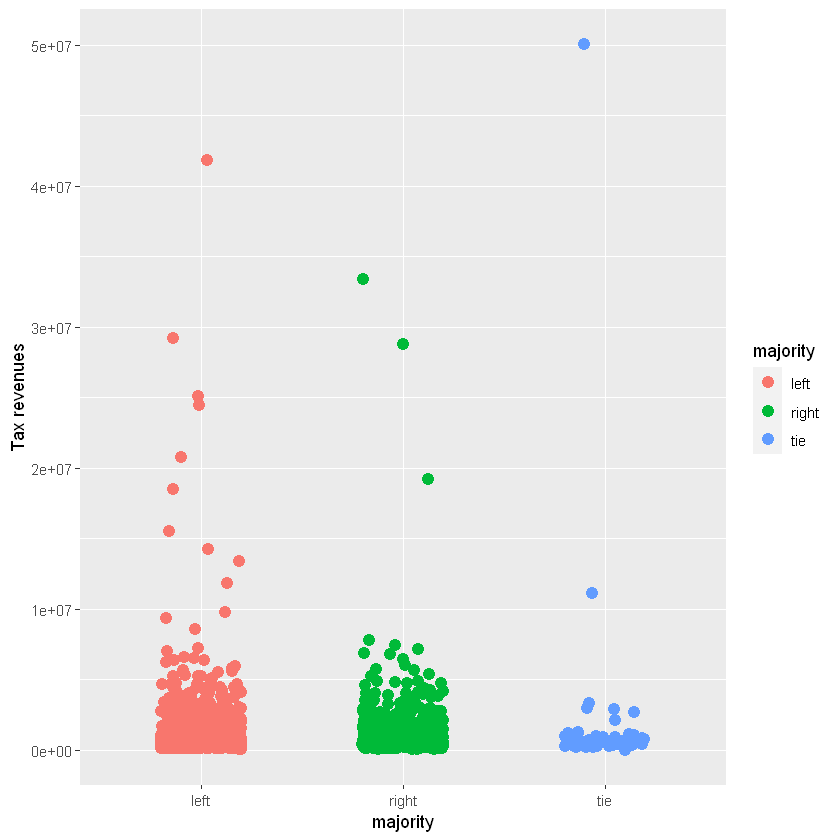

In [269]:
ggplot(df, aes(x = majority, y = `Tax revenues`, color = majority)) +
  geom_point(position = position_jitter(width = 0.2), size = 3)

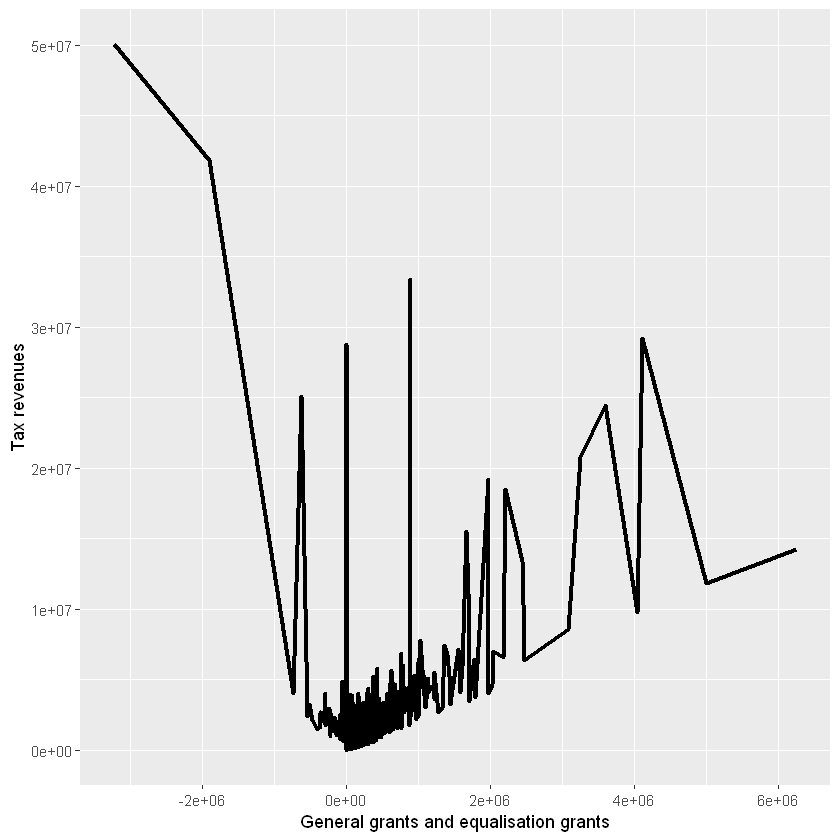

In [273]:
ggplot(df, aes(x = `General grants and equalisation grants`, y = `Tax revenues`)) +
  geom_line(size = 1.2)

## Task 3